In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)
cities

['kailua',
 'hilo',
 'longyearbyen',
 'havelock',
 'codrington',
 'asau',
 'kysyl-syr',
 'rikitea',
 'dikson',
 'albany',
 'itaituba',
 'mataura',
 'te anau',
 'tazovskiy',
 'sarangani',
 'bambous virieux',
 'ushuaia',
 'nanortalik',
 'skelleftea',
 'sitka',
 'toliary',
 'casper',
 'bud',
 'georgetown',
 'qaanaaq',
 'guerrero negro',
 'vaini',
 'vallenar',
 'umm kaddadah',
 'kasongo-lunda',
 'taolanaro',
 'kapaa',
 'tasiilaq',
 'belushya guba',
 'vaitupu',
 'axim',
 'srednekolymsk',
 'half moon bay',
 'mentok',
 'xining',
 'souillac',
 'tabiauea',
 'avdon',
 'atar',
 'lleida',
 'kenora',
 'airai',
 'mabaruma',
 'temaraia',
 'east london',
 'fukue',
 'illoqqortoormiut',
 'oistins',
 'hermanus',
 'lieksa',
 'mahebourg',
 'abonnema',
 'chake chake',
 'kahului',
 'arman',
 'soure',
 'bengkulu',
 'iskateley',
 'avarua',
 'puerto ayacucho',
 'vardo',
 'nikolskoye',
 'norman wells',
 'jamestown',
 'veinticinco de mayo',
 'riyadh',
 'narsaq',
 'severo-kurilsk',
 'buraydah',
 'hithadhoo',
 'bus

In [10]:
from config import weather_api_key
for city in cities:
    url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key + "&q=" + city
   # print(url)

In [11]:
import requests
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e21223426c1975e4c6d4cbf0b1794214


In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kailua
Processing Record 2 of Set 1 | hilo
Processing Record 3 of Set 1 | longyearbyen
Processing Record 4 of Set 1 | havelock
Processing Record 5 of Set 1 | codrington
Processing Record 6 of Set 1 | asau
Processing Record 7 of Set 1 | kysyl-syr
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | dikson
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | itaituba
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | te anau
Processing Record 14 of Set 1 | tazovskiy
Processing Record 15 of Set 1 | sarangani
Processing Record 16 of Set 1 | bambous virieux
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | nanortalik
Processing Record 19 of Set 1 | skelleftea
Processing Record 20 of Set 1 | sitka
Processing Record 21 of Set 1 | toliary
City not found. Skipping...
Processing Record 22 of Set 1 | casper
Processing Record 23 of

Processing Record 37 of Set 4 | alekseyevskoye
Processing Record 38 of Set 4 | emerald
Processing Record 39 of Set 4 | beringovskiy
Processing Record 40 of Set 4 | hobyo
Processing Record 41 of Set 4 | chokurdakh
Processing Record 42 of Set 4 | alice springs
Processing Record 43 of Set 4 | klaksvik
Processing Record 44 of Set 4 | ribeira grande
Processing Record 45 of Set 4 | durban
Processing Record 46 of Set 4 | thompson
Processing Record 47 of Set 4 | yurga
Processing Record 48 of Set 4 | new norfolk
Processing Record 49 of Set 4 | truro
Processing Record 50 of Set 4 | petropavlovka
Processing Record 1 of Set 5 | upernavik
Processing Record 2 of Set 5 | roma
Processing Record 3 of Set 5 | amderma
City not found. Skipping...
Processing Record 4 of Set 5 | mariental
Processing Record 5 of Set 5 | nyrob
Processing Record 6 of Set 5 | the pas
Processing Record 7 of Set 5 | north battleford
Processing Record 8 of Set 5 | kungsbacka
Processing Record 9 of Set 5 | nepomuceno
Processing Rec

Processing Record 25 of Set 8 | kabo
Processing Record 26 of Set 8 | caravelas
Processing Record 27 of Set 8 | tashtyp
Processing Record 28 of Set 8 | ust-barguzin
Processing Record 29 of Set 8 | geraldton
Processing Record 30 of Set 8 | isakly
Processing Record 31 of Set 8 | mount gambier
Processing Record 32 of Set 8 | padang
Processing Record 33 of Set 8 | sao joao do piaui
Processing Record 34 of Set 8 | asha
Processing Record 35 of Set 8 | vila velha
Processing Record 36 of Set 8 | dawei
Processing Record 37 of Set 8 | college
Processing Record 38 of Set 8 | polson
Processing Record 39 of Set 8 | pasighat
Processing Record 40 of Set 8 | saint-pierre
Processing Record 41 of Set 8 | jiroft
City not found. Skipping...
Processing Record 42 of Set 8 | bereda
Processing Record 43 of Set 8 | waddan
Processing Record 44 of Set 8 | yuzhno-sukhokumsk
Processing Record 45 of Set 8 | ohafia
Processing Record 46 of Set 8 | benin
Processing Record 47 of Set 8 | higuey
City not found. Skipping..

Processing Record 14 of Set 12 | ahipara
Processing Record 15 of Set 12 | itaguai
Processing Record 16 of Set 12 | terrace
Processing Record 17 of Set 12 | salinopolis
Processing Record 18 of Set 12 | nishihara
Processing Record 19 of Set 12 | takoradi
Processing Record 20 of Set 12 | digora
Processing Record 21 of Set 12 | starosubkhangulovo
Processing Record 22 of Set 12 | masvingo
Processing Record 23 of Set 12 | fairbanks
Processing Record 24 of Set 12 | mys shmidta
City not found. Skipping...
Processing Record 25 of Set 12 | bhavnagar
Processing Record 26 of Set 12 | ankpa
Processing Record 27 of Set 12 | wuwei
Processing Record 28 of Set 12 | jinchang
Processing Record 29 of Set 12 | cairns
Processing Record 30 of Set 12 | tahta
Processing Record 31 of Set 12 | huanren
Processing Record 32 of Set 12 | ca mau
Processing Record 33 of Set 12 | upington
Processing Record 34 of Set 12 | hamilton
Processing Record 35 of Set 12 | babu
Processing Record 36 of Set 12 | broken hill
Process

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kailua,21.40,-157.74,82.40,65,20,8.05,US,2020-12-23 03:08:10
1,Hilo,19.73,-155.09,80.60,65,20,9.17,US,2020-12-23 03:08:10
2,Longyearbyen,78.22,15.64,24.80,79,40,44.96,SJ,2020-12-23 03:08:11
3,Havelock,34.88,-76.90,39.99,100,1,5.61,US,2020-12-23 03:08:11
4,Codrington,-38.27,141.97,62.56,63,19,11.21,AU,2020-12-23 03:08:11
5,Asau,46.43,26.40,33.01,87,97,4.23,RO,2020-12-23 03:08:11
6,Kysyl-Syr,63.90,122.76,-45.09,77,86,0.85,RU,2020-12-23 03:08:12
7,Rikitea,-23.12,-134.97,77.81,67,9,7.52,PF,2020-12-23 03:08:12
8,Dikson,73.51,80.55,-31.61,82,0,11.56,RU,2020-12-23 03:08:12
9,Albany,42.60,-73.97,35.60,69,90,16.11,US,2020-12-23 03:06:01


In [20]:
new_order=["City", "Country", "Date", "Lat", "Lng","Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kailua,US,2020-12-23 03:08:10,21.40,-157.74,82.40,65,20,8.05
1,Hilo,US,2020-12-23 03:08:10,19.73,-155.09,80.60,65,20,9.17
2,Longyearbyen,SJ,2020-12-23 03:08:11,78.22,15.64,24.80,79,40,44.96
3,Havelock,US,2020-12-23 03:08:11,34.88,-76.90,39.99,100,1,5.61
4,Codrington,AU,2020-12-23 03:08:11,-38.27,141.97,62.56,63,19,11.21
...,...,...,...,...,...,...,...,...,...
565,Vikevag,NO,2020-12-23 03:10:31,59.10,5.70,45.00,75,75,10.29
566,Oliva,ES,2020-12-23 03:10:31,38.92,-0.12,55.00,94,99,1.01
567,Khani,GE,2020-12-23 03:10:31,41.96,42.96,41.00,100,90,6.93
568,Caldwell,US,2020-12-23 03:10:31,43.66,-116.69,37.40,51,20,12.75


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

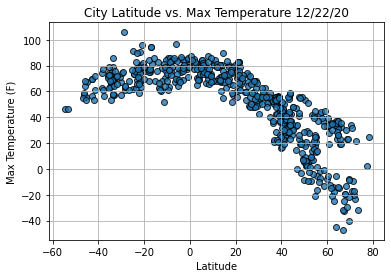

In [28]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

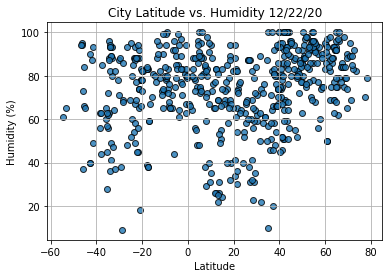

In [30]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

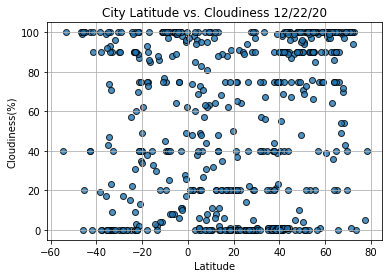

In [31]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

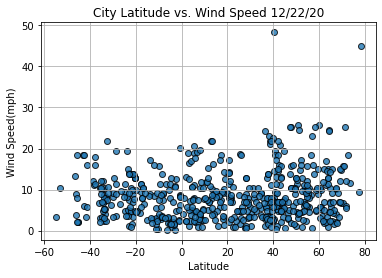

In [33]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()